In [22]:
from quant_test import *
import matplotlib.pyplot as plt

DIM_M = 1024
DIM_N = 3072
NORM_MEAN = 0.0
NORM_STD = 1.0

OUTLIER_NUM = int(DIM_M * DIM_N * 0.001)
MAX_SWEEP_NUM = 10000

#SCALING_FACTOR_PROPOSED = 1200
#SCALING_FACTOR_NAIVE = 50

In [23]:
model = load("/data/hyperaccel/model/megatron-gpt2-345m/ckpt/pytorch_model.bin")
tensor = model["lm_head.weight"] 

In [24]:
proposed_results_x = list()
proposed_results_y = list()
for scaling_factor in range(1500, 2000, 50):
    tensor_proposed, a_vec, b_vec = proposed_quant(tensor, scaling_factor)
    restore_proposed = proposed_restore(tensor_proposed, a_vec, b_vec, scaling_factor)
    proposed_error = get_mse(tensor, restore_proposed)

    proposed_results_x.append(scaling_factor)
    proposed_results_y.append(proposed_error)


In [25]:
naive_results_x = list()
naive_results_y = list()
for scaling_factor in range(50, 100, 1):
    tensor_naive = naive_quant(tensor, scaling_factor)
    restore_naive = naive_restore(tensor_naive, scaling_factor)
    naive_error = get_mse(tensor, restore_naive)

    naive_results_x.append(scaling_factor)
    naive_results_y.append(naive_error)

In [26]:
# Proposed: Quantize to FP8 with maximum value scaling
proposed_min_index = proposed_results_y.index(min(proposed_results_y))
print(f"Proposed - minimum err: {proposed_results_y[proposed_min_index]}, scaling factor: {proposed_results_x[proposed_min_index]}")

# Naive: Quantize to FP8
naive_min_index = naive_results_y.index(min(naive_results_y))
print(f"Naive - minimum err: {naive_results_y[naive_min_index]}, scaling factor: {naive_results_x[naive_min_index]}")

Proposed - minimum err: 0.0033283233642578125, scaling factor: 1700
Naive - minimum err: 3.272294998168945e-05, scaling factor: 99


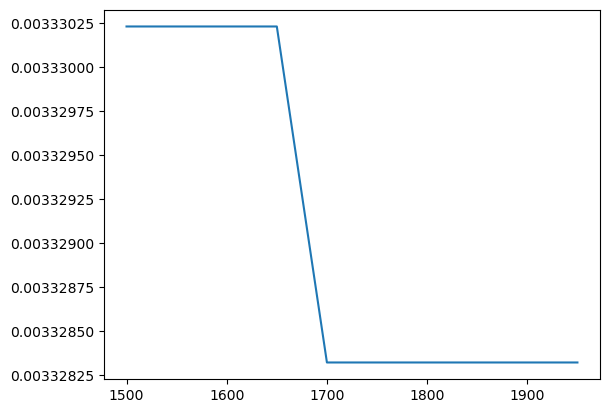

In [27]:
plt.plot(proposed_results_x, proposed_results_y)

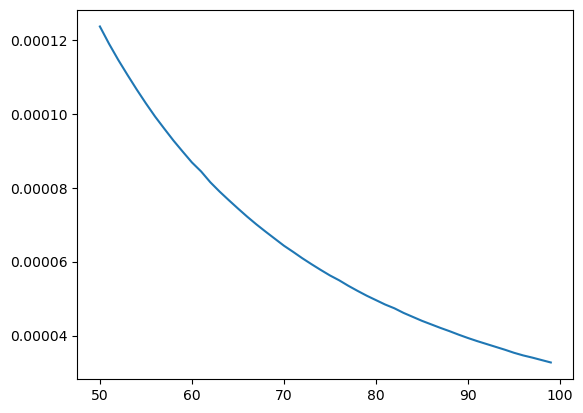

In [28]:
plt.plot(naive_results_x, naive_results_y)